In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator

In [2]:
import NNMFit
from NNMFit.utilities.readout_graphs import HistogramGraph
from NNMFit.core.analysis_config import AnalysisConfig

In [14]:
configs_dir = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/configs/flavor_globalfit/"

In [15]:
config_hdl = AnalysisConfig.from_configs(
        main_config_file=f"{configs_dir}/main_globalfit.cfg",
        analysis_config_file = f"{configs_dir}/analysis_configs/asimov/SAY/asimov_SAY_cascade.yaml",
        config_dir=configs_dir,
        override_dict=None,
        override_config_files=None,
        override_components_files=None,
        override_parameters_files=None)

In [16]:
# build a histogram
hist_graph_hdl = HistogramGraph(config_hdl)
detector_configs = config_hdl.get_det_configs()

/mnt/ceph1-npx/user/tvaneede/software/py_venvs/py3-v4.2.1_nnmfit-v0.3.0/lib/python3.10/site-packages/NNMFit/core/analysis_config.py:726: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(
/mnt/ceph1-npx/user/tvaneede/software/py_venvs/py3-v4.2.1_nnmfit-v0.3.0/lib/python3.10/site-packages/NNMFit/core/analysis_config.py:726: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(
/mnt/ceph1-npx/user/tvaneede/software/py_venvs/py3-v4.2.1_nnmfit-v0.3.0/lib/python3.10/site-packages/NNMFit/core/analysis_config.py:726: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(
/mnt/ceph1-npx/user/tvaneede/software/py_venvs/py3-v4.2.1_nnmfit-v0.3.0/lib/python3.10/site-packages/NNMFit/core/analysis_config.py:726: DeprecationWar

IC86_pass2_SnowStorm_FTP_GlobalFit_Cascades


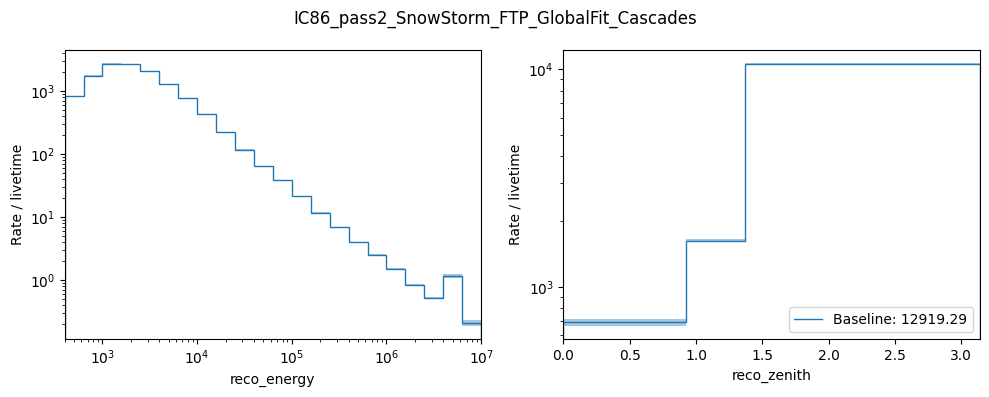

IC86_pass2_SnowStorm_FTP_GlobalFit_DoubleCascades


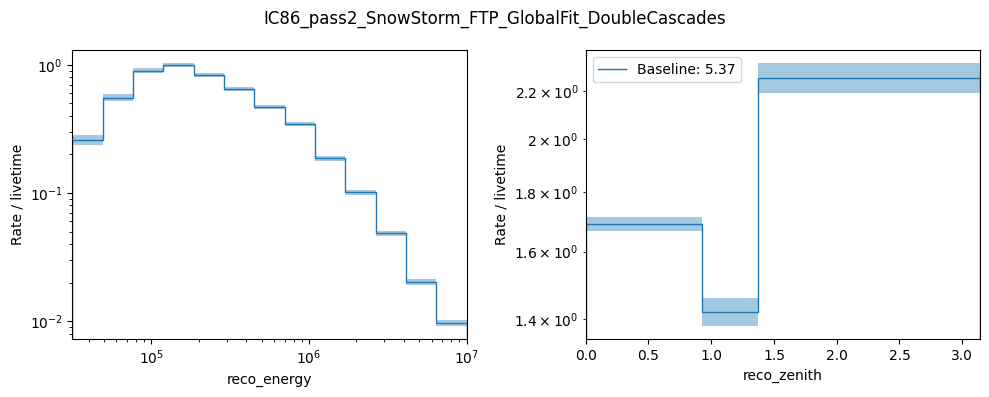

IC86_pass2_SnowStorm_FTP_GlobalFit_Tracks


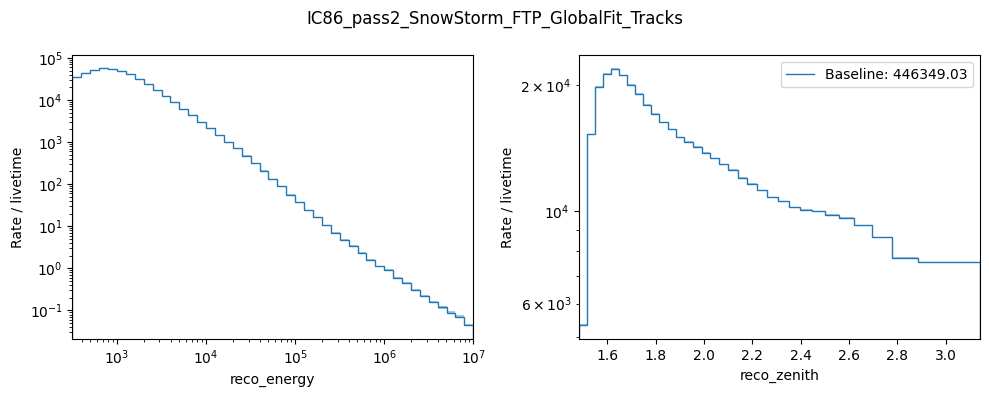

In [17]:
def plot_histogram(hist_graph_hdl, det_config, input_variables):

    print(det_config)
    binnings = hist_graph_hdl.get_binning(det_config=det_config)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    for input_name, input_variable in input_variables.items():

        res = hist_graph_hdl.get_evaled_histogram(input_variables=input_variable, det_config=det_config, reshape=True)

        for i, (variable_name, binning) in enumerate(binnings.items()):

            hist = res["mu"].sum(axis=1-i)
            yerror = np.sqrt(res["ssq"].sum(axis=1-i))

            bin_centers = 0.5 * (binning[:-1] + binning[1:])

            axes[i].stairs(hist, binning, label=f"{input_name}: {sum(hist):.2f}")
            axes[i].fill_between(binning, np.r_[hist - yerror, (hist - yerror)[-1]], np.r_[hist + yerror, (hist + yerror)[-1]], step="post", alpha=0.4)
            # axes[i].errorbar(bin_centers, hist, yerr=yerror, fmt="none", capsize=2)

            axes[i].set_xlabel(variable_name)
            axes[i].set_ylabel("Rate / livetime")

            axes[i].set_xlim(min(binning), max(binning))

            axes[i].set_yscale("log")
            if "energy" in variable_name or "length" in variable_name: axes[i].set_xscale("log")
            if i: axes[i].legend()

    plt.suptitle(det_config)
    plt.tight_layout()
    plt.show()

input_variables = {
    "Baseline" : {}
}
for det_config in detector_configs: plot_histogram(hist_graph_hdl=hist_graph_hdl, det_config=det_config, input_variables = input_variables)

In [13]:
config_hdl = AnalysisConfig.from_configs(
        main_config_file=f"{configs_dir}/main_globalfit.cfg",
        analysis_config_file = f"{configs_dir}/analysis_configs/asimov/SAY/asimov_SAY_cascade.yaml",
        config_dir=configs_dir,
        override_dict=None,
        override_config_files=["override/datasets_globalfit/datasets_22684_22692_train_22612_22645_bdt1_0.45_bdt2_0.67.cfg"],
        override_components_files=None,
        override_parameters_files=None)
# build a histogram
hist_graph_hdl = HistogramGraph(config_hdl)
detector_configs = config_hdl.get_det_configs()


/mnt/ceph1-npx/user/tvaneede/software/py_venvs/py3-v4.2.1_nnmfit-v0.3.0/lib/python3.10/site-packages/NNMFit/core/analysis_config.py:726: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(
/mnt/ceph1-npx/user/tvaneede/software/py_venvs/py3-v4.2.1_nnmfit-v0.3.0/lib/python3.10/site-packages/NNMFit/core/analysis_config.py:726: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(
/mnt/ceph1-npx/user/tvaneede/software/py_venvs/py3-v4.2.1_nnmfit-v0.3.0/lib/python3.10/site-packages/NNMFit/core/analysis_config.py:726: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(
/mnt/ceph1-npx/user/tvaneede/software/py_venvs/py3-v4.2.1_nnmfit-v0.3.0/lib/python3.10/site-packages/NNMFit/core/analysis_config.py:726: DeprecationWar

KeyError: 'log_PF_at100GeV_conv_a'